In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

### Loading the Training Dataset

In [3]:
train_insurance_df = pd.read_csv("../data/train_storming_round.csv")
train_insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15308 entries, 0 to 15307
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   row_id                           15308 non-null  int64 
 1   agent_code                       15308 non-null  object
 2   agent_age                        15308 non-null  int64 
 3   agent_join_month                 15308 non-null  object
 4   first_policy_sold_month          15308 non-null  object
 5   year_month                       15308 non-null  object
 6   unique_proposals_last_7_days     15308 non-null  int64 
 7   unique_proposals_last_15_days    15308 non-null  int64 
 8   unique_proposals_last_21_days    15308 non-null  int64 
 9   unique_proposal                  15308 non-null  int64 
 10  unique_quotations_last_7_days    15308 non-null  int64 
 11  unique_quotations_last_15_days   15308 non-null  int64 
 12  unique_quotations_last_21_days  

In [4]:
train_insurance_df.head()

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,...,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies
0,1,455ca878,45,2/1/2021,9/1/2023,1/1/2023,3,6,2,12,...,9,3,4,8,15,0,0,93313,30,162
1,2,c823ce77,48,4/1/2022,2/1/2024,1/1/2023,1,4,12,21,...,14,4,3,10,17,25,1071450,164804,0,175
2,3,62154055,53,5/1/2020,9/1/2023,1/1/2023,3,5,5,17,...,14,3,7,11,21,26,1601210,426690,84,78
3,4,c58bfa6e,44,7/1/2019,3/1/2022,1/1/2023,1,0,12,17,...,11,2,2,9,13,18,283230,47793,39,144
4,5,b1e5f770,20,9/1/2020,2/1/2023,1/1/2023,0,6,10,17,...,13,3,10,6,19,20,1957680,562239,19,40


# Insurance Dataset Data Dictionary

| Column Name                         | Data Type | Description |
|-------------------------------------|-----------|-------------|
| **row_id**                          | `int64`   | Unique identifier for each row. |
| **agent_code**                      | `object`  | Unique code identifying an insurance agent. Helps track agent-wise performance. |
| **agent_age**                       | `int64`   | Age of the insurance agent (in years). |
| **agent_join_month**                | `object`  | When the agent joined. Important for calculating tenure. |
| **first_policy_sold_month**         | `object`  | When the agent sold their first policy. Can be used to calculate delay or ramp-up time. |
| **year_month**                      | `object`  | Indicates the reporting period for that row. |
| **unique_proposals_last_7_days**    | `int64`   | Number of unique insurance proposals made by the agent in the last 7 days. |
| **unique_proposals_last_15_days**   | `int64`   | Number of unique proposals in the last 15 days. |
| **unique_proposals_last_21_days**   | `int64`   | Number of unique proposals in the last 21 days. |
| **unique_proposal**                 | `int64`   | Total unique proposals submitted during the full `year_month`. |
| **unique_quotations_last_7_days**   | `int64`   | Number of unique quotations (offers) given in the last 7 days. |
| **unique_quotations_last_15_days**  | `int64`   | Quotations in the last 15 days. |
| **unique_quotations_last_21_days**  | `int64`   | Quotations in the last 21 days. |
| **unique_quotations**               | `int64`   | Total unique quotations in the current month. |
| **unique_customers_last_7_days**    | `int64`   | Number of different customers approached in the last 7 days. |
| **unique_customers_last_15_days**   | `int64`   | Different customers in last 15 days. |
| **unique_customers_last_21_days**   | `int64`   | Different customers in last 21 days. |
| **unique_customers**                | `int64`   | Total unique customers interacted with in the month. |
| **new_policy_count**                | `int64`   | **Target variable** – Number of new insurance policies successfully sold by the agent during the month. |
| **ANBP_value**                      | `int64`   | Annualized New Business Premium – the total premium from newly sold policies. |
| **net_income**                      | `int64`   | Agent's net income/commission earned for that month. |
| **number_of_policy_holders**        | `int64`   | Number of people who hold active policies |
| **number_of_cash_payment_policies** | `int64`   | Policies paid for in cash (vs. digital or bank). Could indicate financial behavior of clients. |


In [6]:
train_insurance_df.isna().sum()

row_id                             0
agent_code                         0
agent_age                          0
agent_join_month                   0
first_policy_sold_month            0
year_month                         0
unique_proposals_last_7_days       0
unique_proposals_last_15_days      0
unique_proposals_last_21_days      0
unique_proposal                    0
unique_quotations_last_7_days      0
unique_quotations_last_15_days     0
unique_quotations_last_21_days     0
unique_quotations                  0
unique_customers_last_7_days       0
unique_customers_last_15_days      0
unique_customers_last_21_days      0
unique_customers                   0
new_policy_count                   0
ANBP_value                         0
net_income                         0
number_of_policy_holders           0
number_of_cash_payment_policies    0
dtype: int64

#### Observation: There are no missing values in training dataset

In [8]:
train_insurance_df.duplicated().sum()

0

#### Observation: There are no duplicate values in training dataset

## Exploratory Data Analysis

In [14]:
print("BASIC DATA OVERVIEW")
print(f"Total Records: {len(train_insurance_df)}")
print(f"Unique Agents: {train_insurance_df['agent_code'].nunique()}")
print("\nFirst 5 Records:")
display(train_insurance_df.head())

BASIC DATA OVERVIEW
Total Records: 15308
Unique Agents: 905

First 5 Records:


,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,...,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies
0,1,455ca878,45,2/1/2021,9/1/2023,1/1/2023,3,6,2,12,...,9,3,4,8,15,0,0,93313,30,162
1,2,c823ce77,48,4/1/2022,2/1/2024,1/1/2023,1,4,12,21,...,14,4,3,10,17,25,1071450,164804,0,175
2,3,62154055,53,5/1/2020,9/1/2023,1/1/2023,3,5,5,17,...,14,3,7,11,21,26,1601210,426690,84,78
3,4,c58bfa6e,44,7/1/2019,3/1/2022,1/1/2023,1,0,12,17,...,11,2,2,9,13,18,283230,47793,39,144
4,5,b1e5f770,20,9/1/2020,2/1/2023,1/1/2023,0,6,10,17,...,13,3,10,6,19,20,1957680,562239,19,40


In [17]:
train_insurance_df.shape

(15308, 23)

### Univariate Analysis

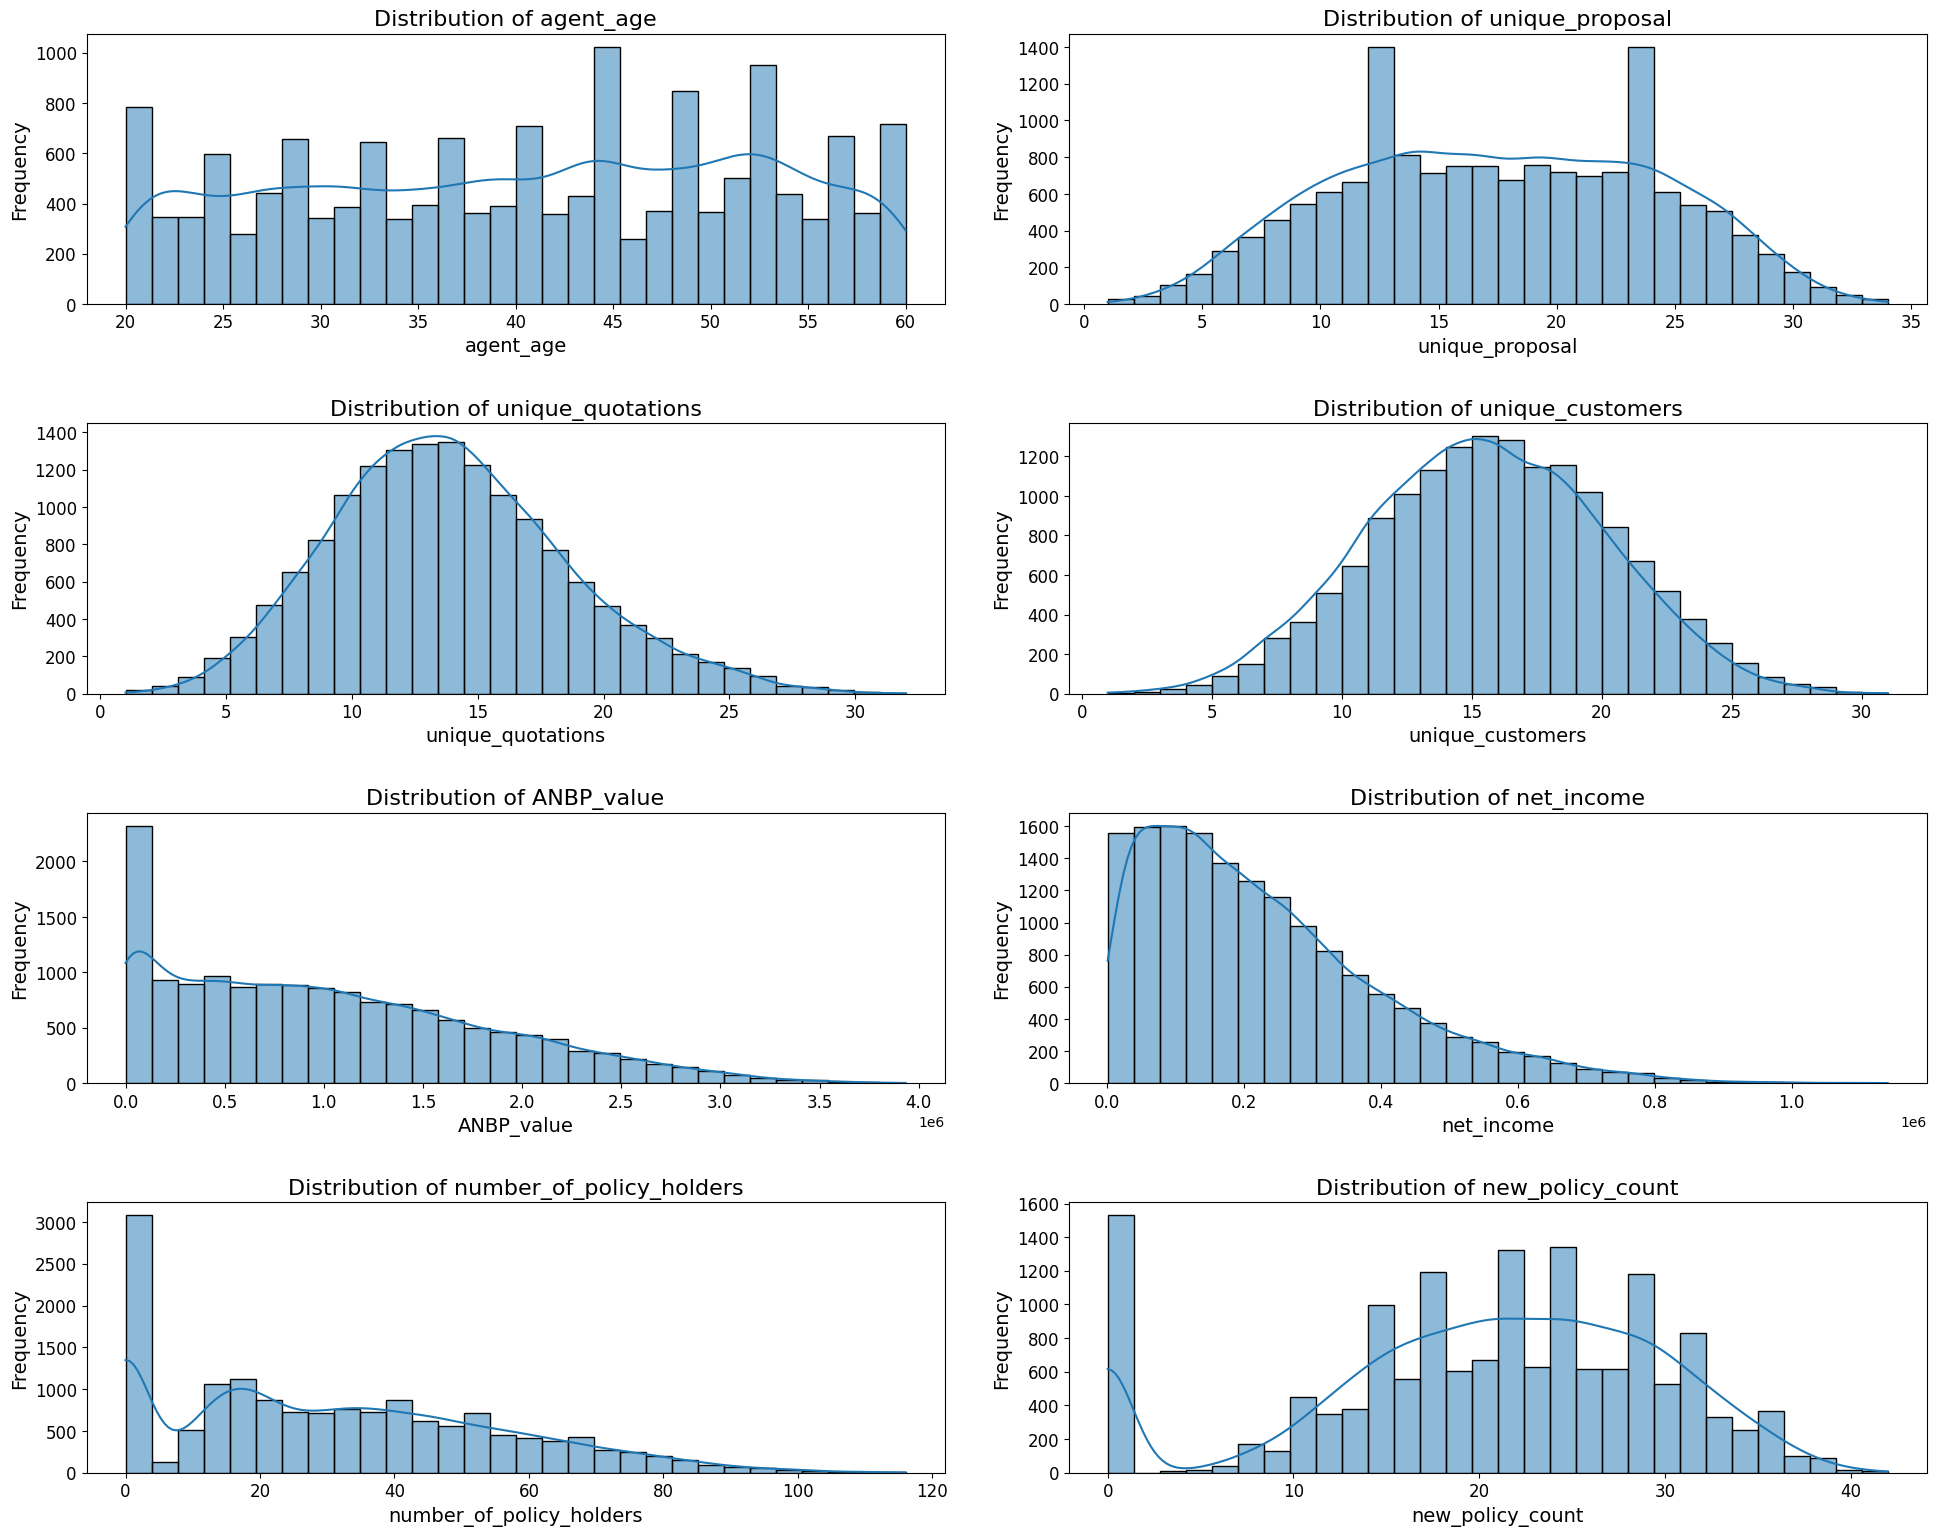

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = ['agent_age', 'unique_proposal', 'unique_quotations', 
                'unique_customers', 'ANBP_value', 'net_income',
                'number_of_policy_holders', 'new_policy_count']

plt.figure(figsize=(20, 16))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(train_insurance_df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
plt.tight_layout(pad=3.0)
plt.show()

for col in num_features:
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(train_insurance_df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=16)
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    
    fig.savefig(f'{col}_histogram.png', bbox_inches='tight')
    plt.close(fig)


#### Key Observations from Univariate Analysis: 

- Distribution of ANBP_Value, New_Policy_Count and Net_income are right skewed while the others are approximately normally distributed
- Most agents are between 20 and 60 years old, with a concentration around 40.
- The majority of agents sell a relatively low number of new policies, but there are some high performers.
- ANBP Value: This business metric is highly skewed, with most agents generating lower values and a few generating much higher ones.
- Net Income: Similar to ANBP, net income is right-skewed, indicating a small number of agents earn significantly more.

### Bivariate Analysis

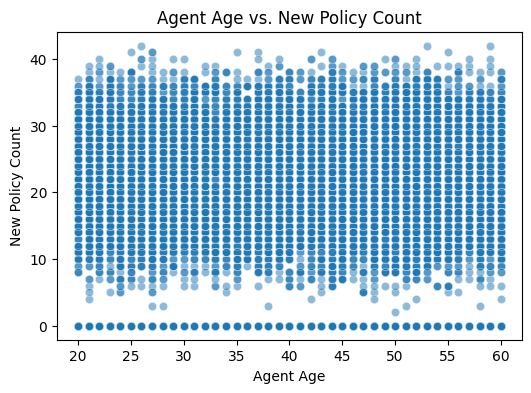

In [24]:
#Relationship between agent_age and new_policy_count
plt.figure(figsize=(6,4))
sns.scatterplot(x='agent_age', y='new_policy_count', data=train_insurance_df, alpha=0.5)
plt.title('Agent Age vs. New Policy Count')
plt.xlabel('Agent Age')
plt.ylabel('New Policy Count')
plt.savefig('agent_age_vs_new_policy_count.png', bbox_inches='tight', dpi=300)
plt.show()

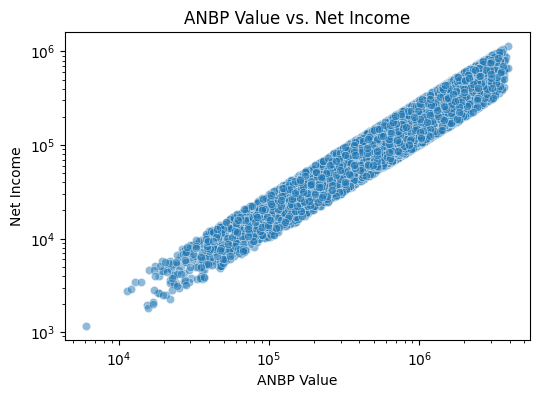

In [25]:
# Relationship between ANBP_value and net_income
plt.figure(figsize=(6,4))
sns.scatterplot(x='ANBP_value', y='net_income', data=train_insurance_df, alpha=0.5)
plt.title('ANBP Value vs. Net Income')
plt.xlabel('ANBP Value')
plt.ylabel('Net Income')
plt.xscale('log')
plt.yscale('log')
plt.savefig('ANBP Value vs. Net Income.png', bbox_inches='tight', dpi=300)
plt.show()

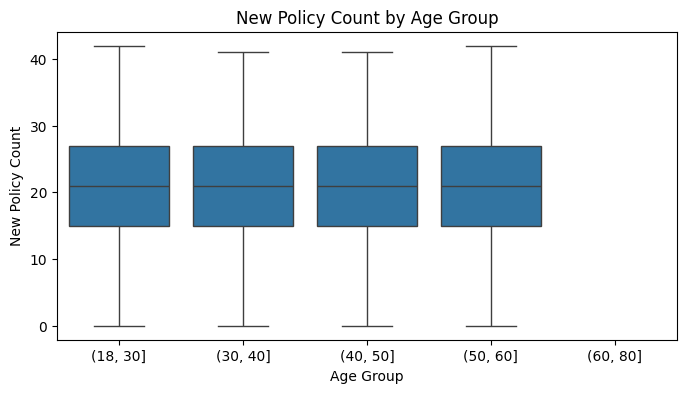

In [26]:
# Boxplot of new_policy_count by agent_age groups
age_bins = [18, 30, 40, 50, 60, 80]
train_insurance_df['age_group'] = pd.cut(train_insurance_df['agent_age'], bins=age_bins)
plt.figure(figsize=(8,4))
sns.boxplot(x='age_group', y='new_policy_count', data=train_insurance_df)
plt.title('New Policy Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('New Policy Count')
plt.savefig('New Policy count by Age Group.png', bbox_inches='tight', dpi=300)
plt.show()

#### Key Observations from Bivariate Analysis: 

- Agent Age vs. New Policy Count: There’s no strong visible trend, but we can see the spread of performance across ages.
- ANBP Value vs. Net Income: There’s a clear positive relationship, as expected—higher business value leads to higher income.
- New Policy Count by Age Group: Boxplots show that younger and middle-aged agents tend to have a wider range of performance, with some outliers in each group.

### MultiVariate Analysis

We will use **Pairplot**: This visualizes pairwise relationships and distributions among agent age, new policy count, ANBP value, and net income. It helps spot clusters, outliers, and correlations.

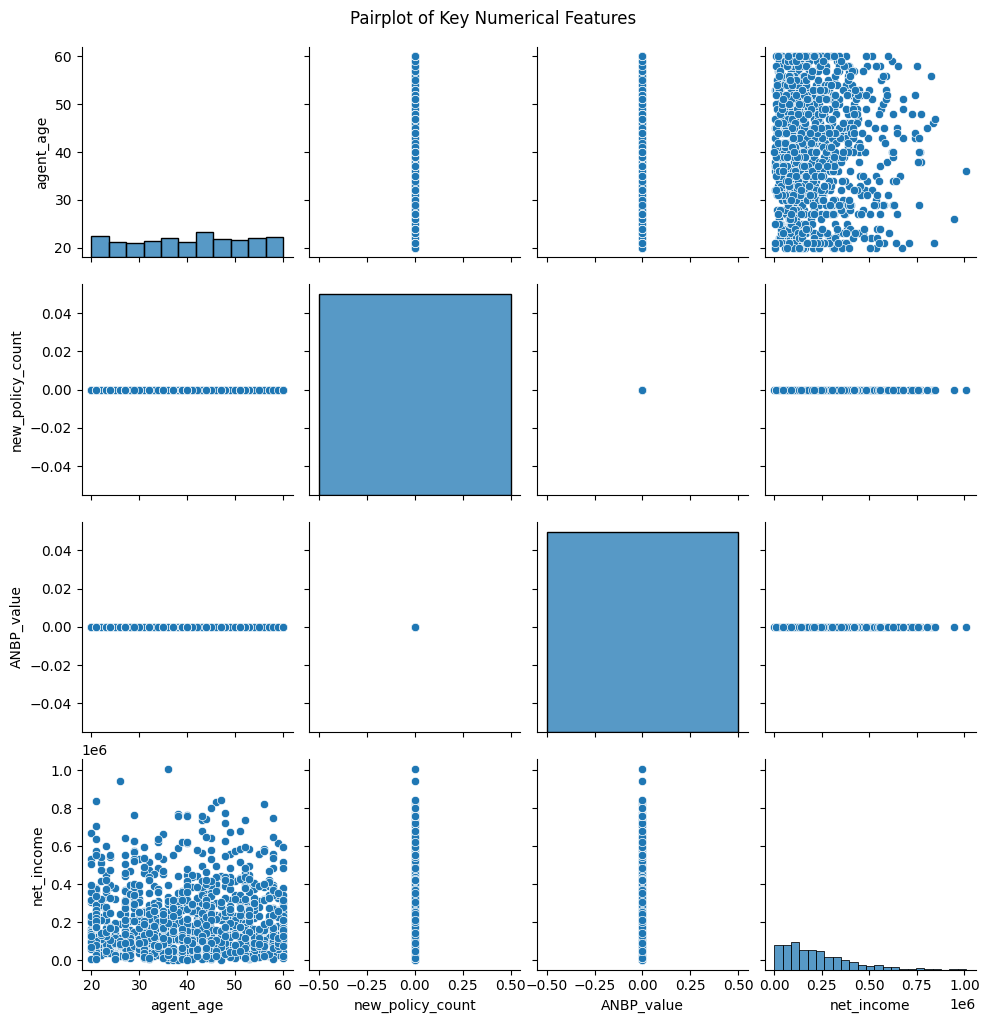

In [30]:
selected_cols = ['agent_age', 'new_policy_count', 'ANBP_value', 'net_income']
pair_grid = sns.pairplot(train_insurance_df[selected_cols].sample(1000, random_state=42))
pair_grid.fig.suptitle('Pairplot of Key Numerical Features', y=1.02)
pair_grid.fig.savefig('pairplot_key_numerical_features.png', bbox_inches='tight', dpi=300)
plt.show()

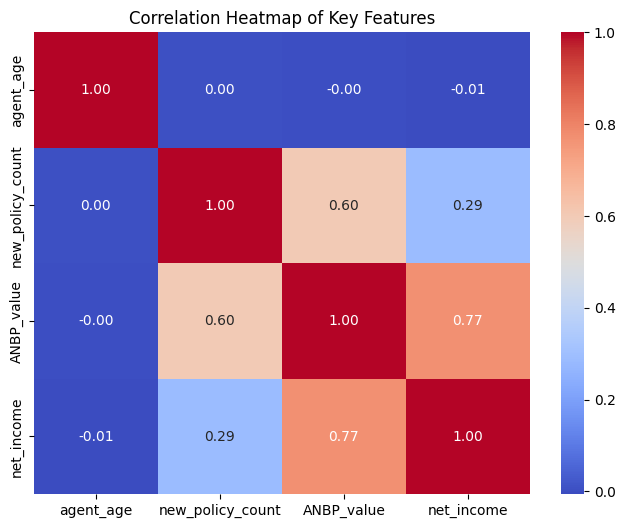

In [31]:
plt.figure(figsize=(8,6))
corr = train_insurance_df[selected_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Key Features')
plt.savefig('Correlation heatmap for key features.png', bbox_inches='tight', dpi=300)
plt.show()

train_insurance_df.drop('age_group', axis=1, inplace=True)

### More Meaningful Insights

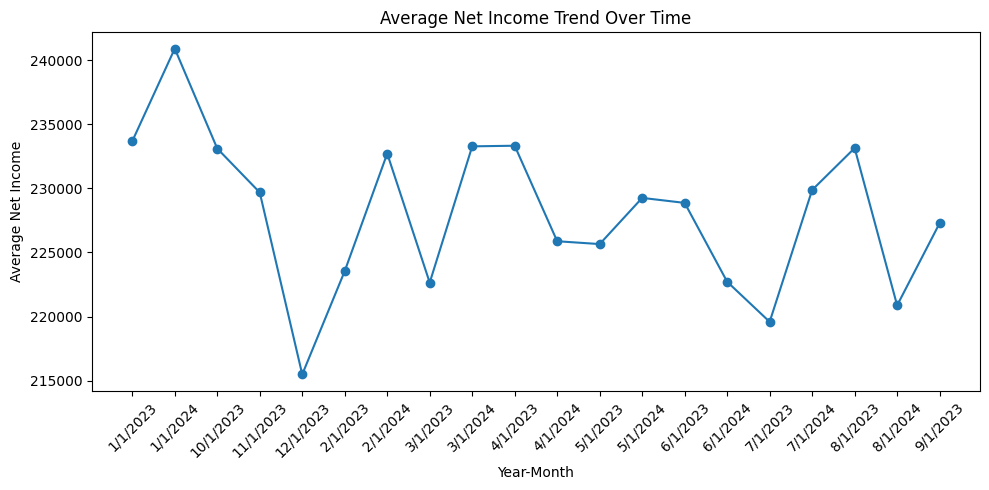

In [33]:
time_trend = train_insurance_df.groupby('year_month')['net_income'].mean()
plt.figure(figsize=(10, 5))
plt.plot(time_trend.index, time_trend.values, marker='o')
plt.title('Average Net Income Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Net Income')
plt.xticks(rotation=45)
plt.savefig('Avg net income trend over time', bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

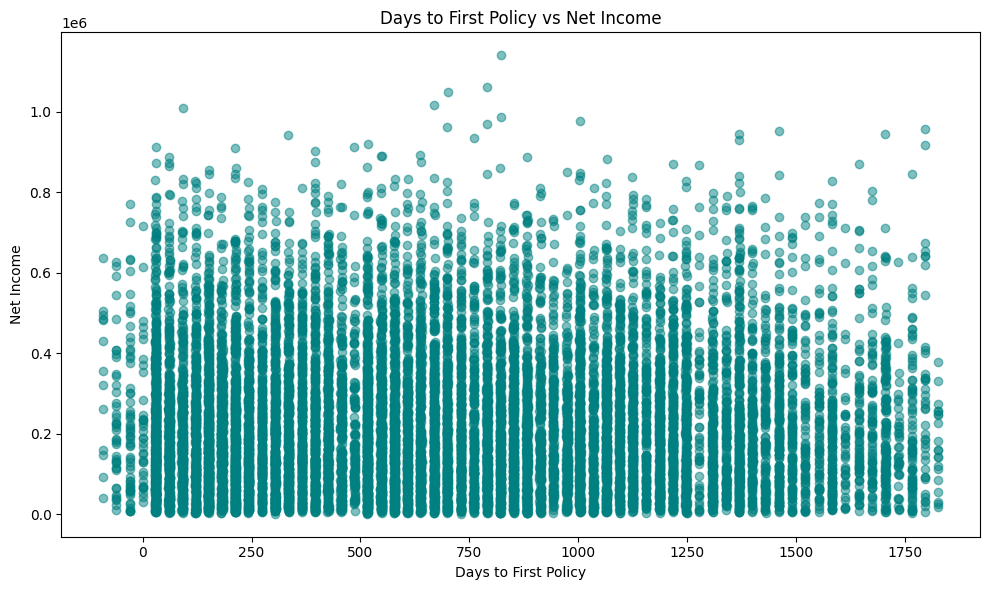

In [34]:
train_insurance_df['agent_join_month'] = pd.to_datetime(train_insurance_df['agent_join_month'], format='%m/%d/%Y', errors='coerce')
train_insurance_df['first_policy_sold_month'] = pd.to_datetime(train_insurance_df['first_policy_sold_month'], format='%m/%d/%Y', errors='coerce')

train_insurance_df['days_to_first_policy'] = (train_insurance_df['first_policy_sold_month'] - train_insurance_df['agent_join_month']).dt.days

plt.figure(figsize=(10, 6))
plt.scatter(train_insurance_df['days_to_first_policy'], train_insurance_df['net_income'], alpha=0.5, color='teal')
plt.title('Days to First Policy vs Net Income')
plt.xlabel('Days to First Policy')
plt.ylabel('Net Income')
plt.savefig('Days to first policy vs net income', bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()


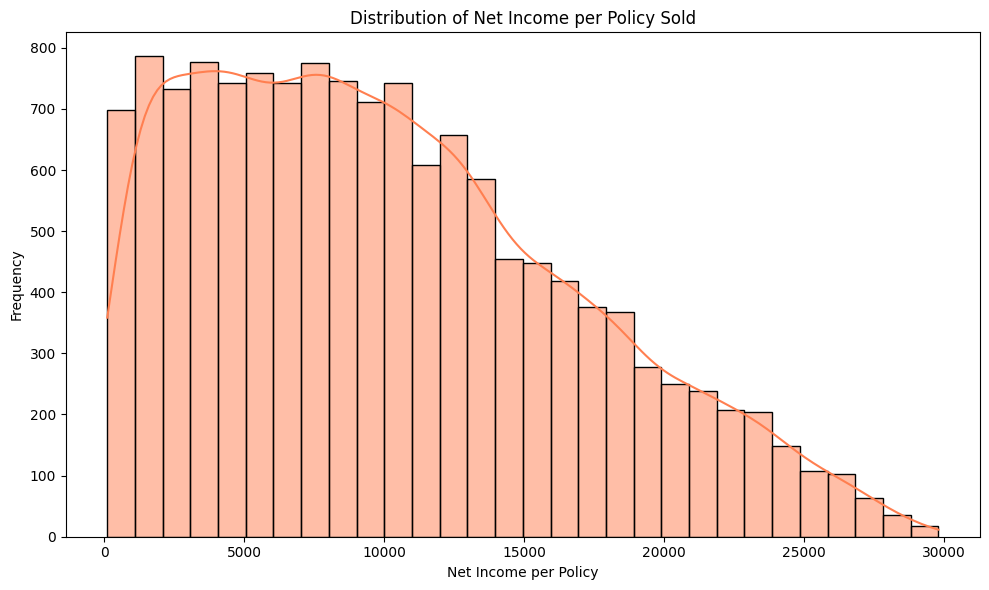

In [35]:
train_insurance_df['income_per_policy'] = train_insurance_df['net_income'] / train_insurance_df['new_policy_count'].replace(0, np.nan)

plt.figure(figsize=(10, 6))
sns.histplot(train_insurance_df['income_per_policy'].dropna(), bins=30, kde=True, color='coral')
plt.title('Distribution of Net Income per Policy Sold')
plt.xlabel('Net Income per Policy')
plt.ylabel('Frequency')
plt.savefig('Net income per policy sold.png', bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

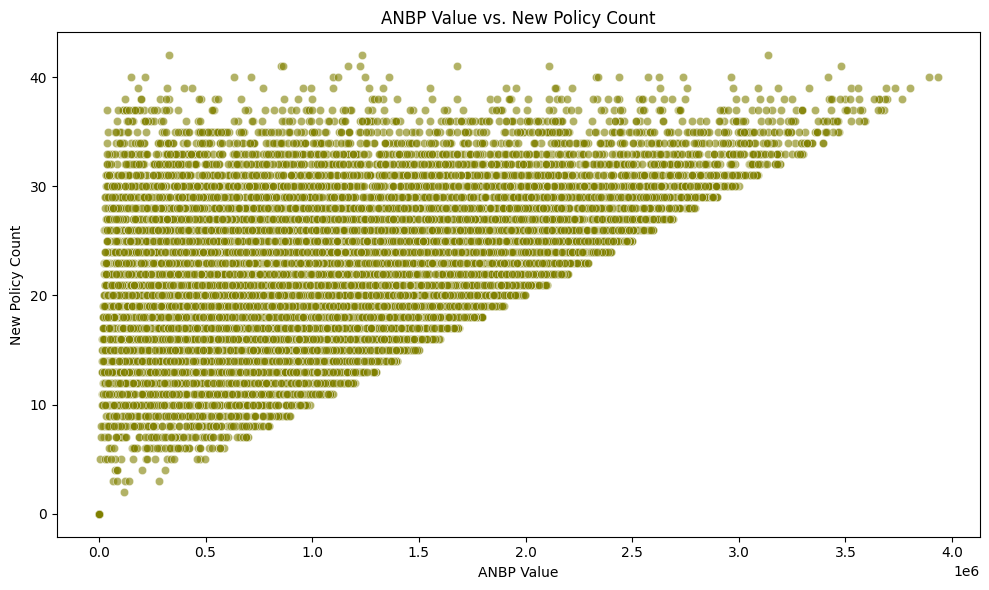

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ANBP_value', y='new_policy_count', data=train_insurance_df, alpha=0.6, color='olive')
plt.title('ANBP Value vs. New Policy Count')
plt.xlabel('ANBP Value')
plt.ylabel('New Policy Count')
plt.savefig('ANBP Vs new policy count.png', bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

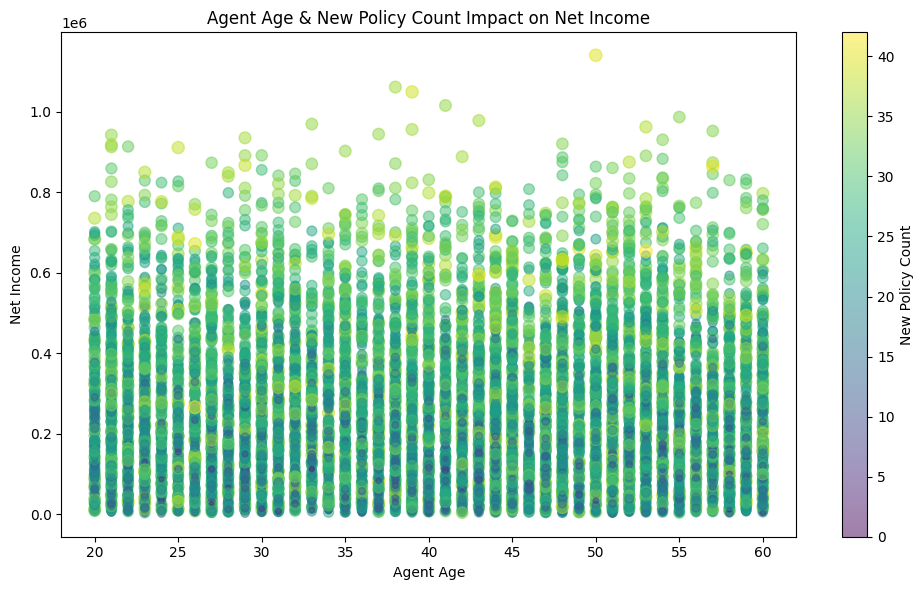

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(train_insurance_df['agent_age'], train_insurance_df['net_income'], s=train_insurance_df['new_policy_count']*2, alpha=0.5, c=train_insurance_df['new_policy_count'], cmap='viridis')
plt.colorbar(label='New Policy Count')
plt.title('Agent Age & New Policy Count Impact on Net Income')
plt.xlabel('Agent Age')
plt.ylabel('Net Income')
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_1892\2225679794.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_time_trend = train_insurance_df.groupby(['year_month','age_group'])['net_income'].mean().reset_index()


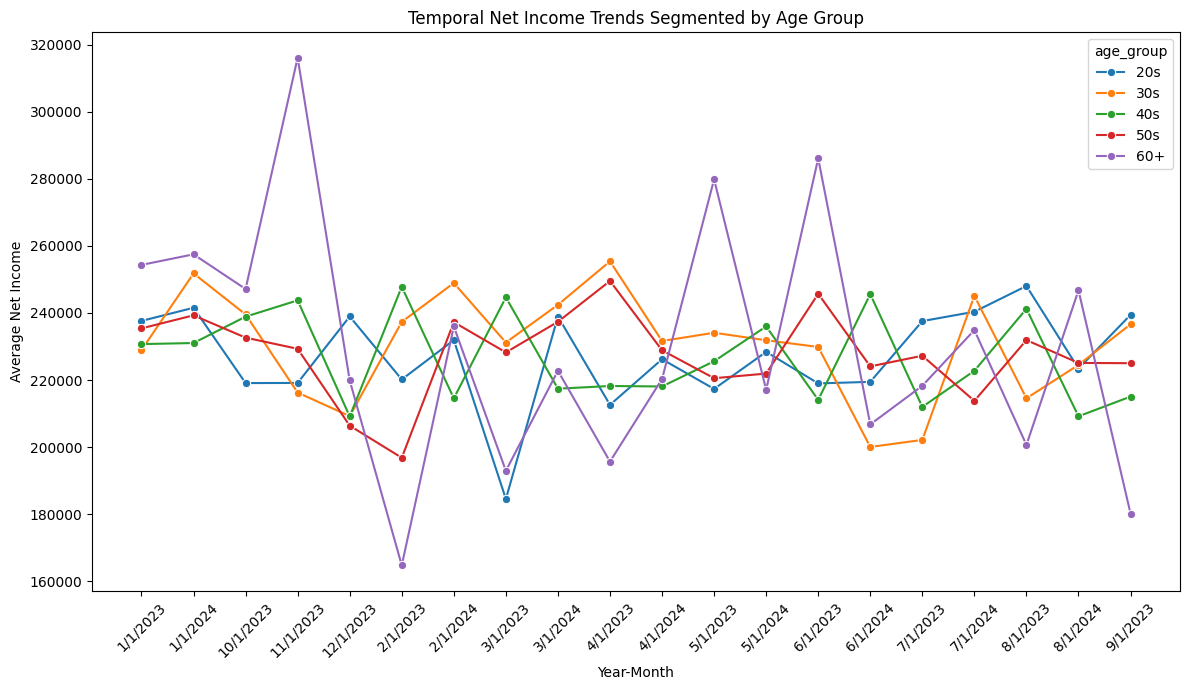

In [38]:
train_insurance_df['age_group'] = pd.cut(train_insurance_df['agent_age'], bins=[20,30,40,50,60,100], right=False, labels=['20s','30s','40s','50s','60+'])
age_time_trend = train_insurance_df.groupby(['year_month','age_group'])['net_income'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(data=age_time_trend, x='year_month', y='net_income', hue='age_group', marker='o')
plt.title('Temporal Net Income Trends Segmented by Age Group')
plt.xlabel('Year-Month')
plt.ylabel('Average Net Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Temporal net income by age group.png', bbox_inches='tight', dpi=300)
plt.show()


### Temporal Analysis

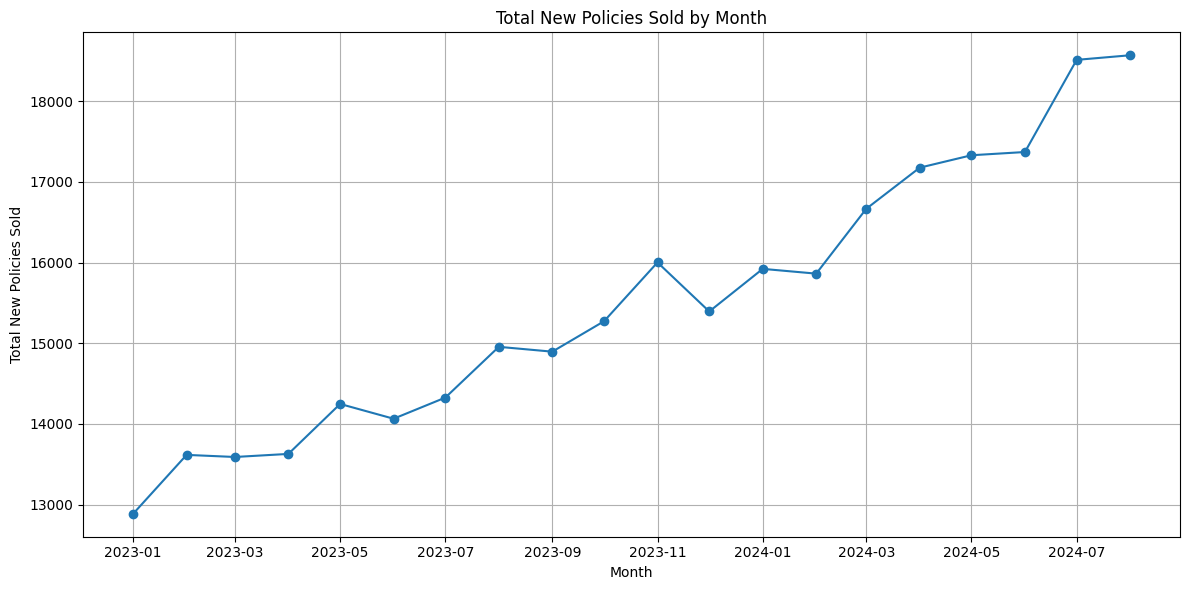

                 mean  median    sum  count
year_month                                 
2023-09-01  19.994631    21.0  14896    745
2023-10-01  20.229139    21.0  15273    755
2023-11-01  20.972477    22.0  16002    763
2023-12-01  19.863226    21.0  15394    775
2024-01-01  20.103535    21.0  15922    792
2024-02-01  19.681141    21.0  15863    806
2024-03-01  20.274939    21.0  16666    822
2024-04-01  20.399050    21.0  17176    842
2024-05-01  20.364277    22.0  17330    851
2024-06-01  19.942595    21.0  17370    871
2024-07-01  20.753363    22.0  18512    892
2024-08-01  20.518232    21.0  18569    905


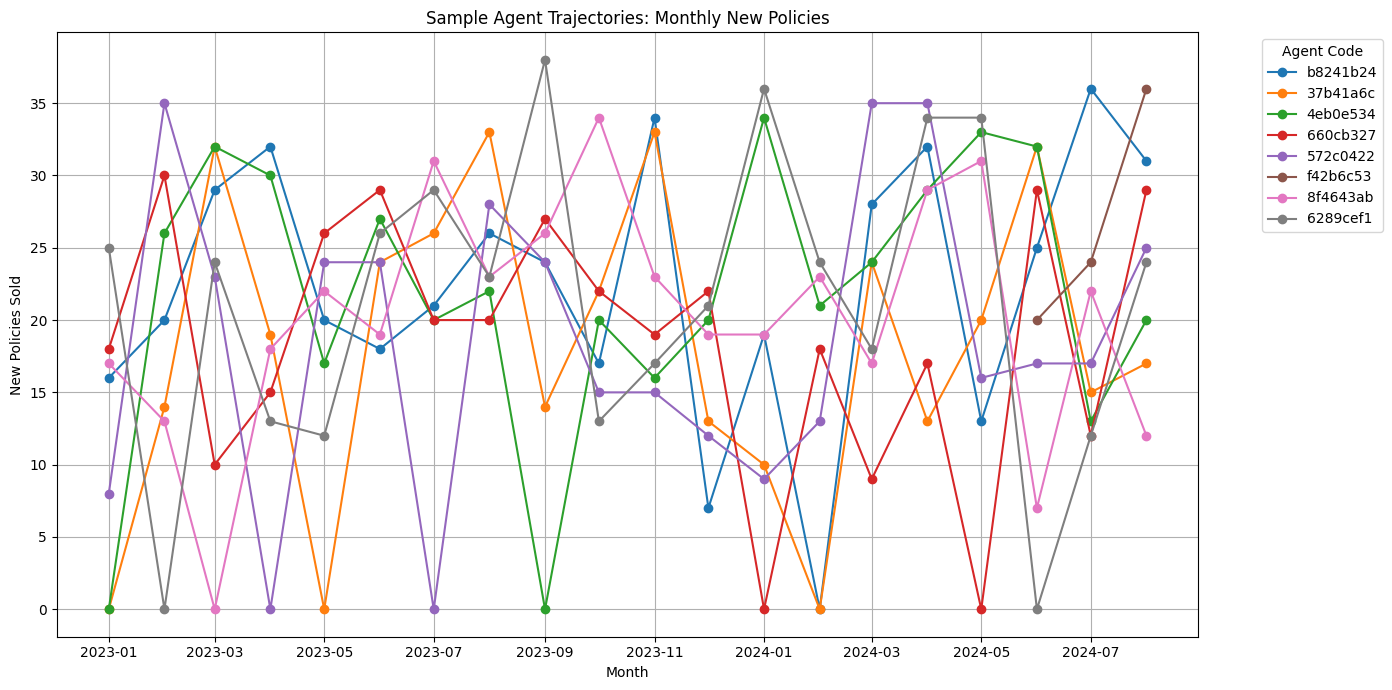

Months with significant spikes:
Empty DataFrame
Columns: [year_month, new_policy_count]
Index: []
Months with significant drops:
Empty DataFrame
Columns: [year_month, new_policy_count]
Index: []


In [41]:
from scipy.stats import zscore

train_insurance_df['year_month'] = pd.to_datetime(train_insurance_df['year_month'])

time_series = train_insurance_df.groupby('year_month')['new_policy_count'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(time_series['year_month'], time_series['new_policy_count'], marker='o')
plt.title('Total New Policies Sold by Month')
plt.xlabel('Month')
plt.ylabel('Total New Policies Sold')
plt.grid(True)
plt.tight_layout()

plt.savefig('Total new policies sold by months.png', bbox_inches='tight', dpi=300)
plt.show()

monthly_stats = train_insurance_df.groupby('year_month')['new_policy_count'].agg(['mean', 'median', 'sum', 'count'])
print(monthly_stats.tail(12))

sample_agents = train_insurance_df['agent_code'].drop_duplicates().sample(8, random_state=42)
agent_traj = train_insurance_df[train_insurance_df['agent_code'].isin(sample_agents)]

plt.figure(figsize=(14, 7))

for agent in sample_agents:
    agent_data = agent_traj[agent_traj['agent_code'] == agent]
    plt.plot(agent_data['year_month'], agent_data['new_policy_count'], marker='o', label=agent)

plt.title('Sample Agent Trajectories: Monthly New Policies')
plt.xlabel('Month')
plt.ylabel('New Policies Sold')
plt.legend(title='Agent Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.savefig('sample_agent_trajectories.png', bbox_inches='tight', dpi=300)

plt.show()


monthly_sum = time_series['new_policy_count']
z_scores = zscore(monthly_sum)
time_series['z_score'] = z_scores
spikes = time_series[time_series['z_score'] > 2]
drops = time_series[time_series['z_score'] < -2]

print('Months with significant spikes:')
print(spikes[['year_month', 'new_policy_count']])
print('Months with significant drops:')
print(drops[['year_month', 'new_policy_count']])

## Observations from Temporal Analysis

#### The total new policies sold shows some interesting patterns:
- There's a general upward trend in total policies sold over time
- The trend shows some seasonality with regular peaks and troughs
- The most recent months show increased volatility in sales numbers

### The monthly statistics reveal:

- Average new policies per agent consistently hover around 20
- The median is typically around 21-22 policies
- The total number of agents (count) has been steadily increasing from 745 to 905


### The sample of agent trajectories shows:
- High variability in individual performance
- Some agents maintain consistent sales levels while others show more volatility
- A few agents show dramatic improvements or declines over time


###### ----------------------------------
To understand how individual agent trajectories evolve over time, I analyzed the monthly new policy counts for a sample of agents and visualized their performance trends.

First, here’s a visualization of several agents’ sales trajectories across the observed months:
This reveals several key patterns:

Some agents maintain steady performance, consistently selling a similar number of policies each month.
Others show upward or downward trends, indicating improvement or decline in their sales activity.
A few agents display high volatility, with sharp increases or decreases in certain months—these could be due to special campaigns, personal circumstances, or other external factors.
To quantify these trends, I calculated a 3-month rolling average for each agent, which smooths out short-term fluctuations and highlights longer-term changes. Agents with a consistently rising rolling average are likely improving, while those with a declining average may need support or intervention.

Additionally, I looked at the month-over-month percentage change in sales for each agent. Most agents have small, regular changes, but some experience large swings, which could signal instability or unique events.

Overall, individual agent trajectories are diverse:

The majority are stable or gradually improving.
A subset shows persistent decline, which could be an early warning sign for disengagement or risk of becoming NILL (no sales).

### Analyzing Agent Performance Trends

C:\Users\HP\AppData\Local\Temp\ipykernel_1892\2073723672.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sorted['mom_change'].replace([np.inf, -np.inf], np.nan, inplace=True)


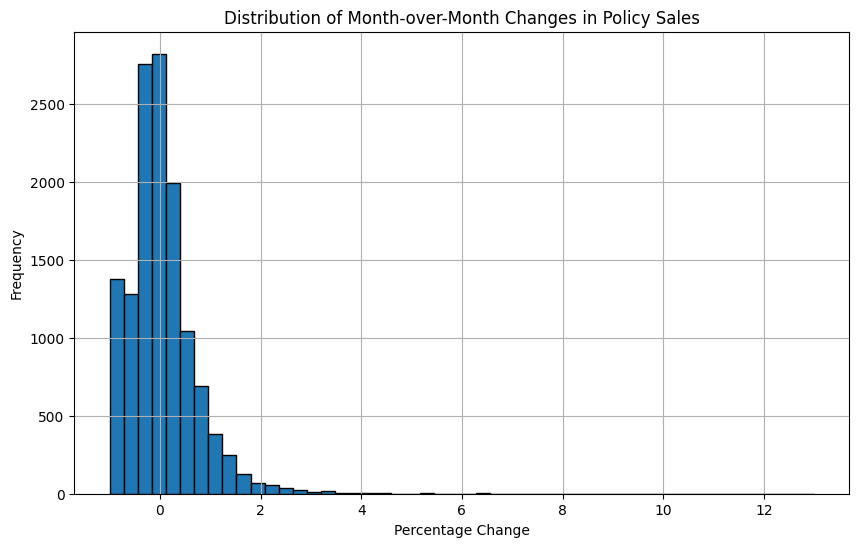

Summary of Declining Agents:
Number of agents showing decline: 303

Performance metrics for declining agents:
       new_policy_count  rolling_3m_avg  mom_change
count        303.000000      303.000000  303.000000
mean          10.910891       18.444994   -0.541589
std            7.316541        4.564949    0.319864
min            0.000000        6.000000   -1.000000
25%            0.000000       15.416667   -1.000000
50%           13.000000       19.000000   -0.451613
75%           17.000000       21.416667   -0.296296
max           20.000000       30.000000   -0.047619


In [51]:
train_insurance_df['year_month'] = pd.to_datetime(train_insurance_df['year_month'])

df_sorted = train_insurance_df.sort_values(['agent_code', 'year_month'])
df_sorted['rolling_3m_avg'] = df_sorted.groupby('agent_code')['new_policy_count'].rolling(window=3, min_periods=1).mean().reset_index(0, drop=True)

df_sorted['mom_change'] = df_sorted.groupby('agent_code')['new_policy_count'].pct_change()
df_sorted['mom_change'].replace([np.inf, -np.inf], np.nan, inplace=True)

latest_month = df_sorted['year_month'].max()
current_median = df_sorted[df_sorted['year_month'] == latest_month]['new_policy_count'].median()

declining_agents = df_sorted[
    (df_sorted['year_month'] == latest_month) & 
    (df_sorted['new_policy_count'] < current_median) &
    (df_sorted['mom_change'] < 0)
]

plt.figure(figsize=(10, 6))
plt.hist(df_sorted['mom_change'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution of Month-over-Month Changes in Policy Sales')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('Month over month changess.png', bbox_inches='tight', dpi=300)
plt.show()


print("Summary of Declining Agents:")
print("Number of agents showing decline:", len(declining_agents))
print("\nPerformance metrics for declining agents:")
print(declining_agents[['new_policy_count', 'rolling_3m_avg', 'mom_change']].describe())

Summary Statistics:
        new_policy_count  ANBP_value  net_income
mean               20.27  1025337.79   228041.39
median             21.00   903144.50   189974.00
std                 9.54   805498.86   173667.10
min                 0.00        0.00     1160.00
max                42.00  3933840.00  1140237.00
Average Policies per Agent Distribution:
count    905.000000
mean      20.338976
std        2.736656
min        6.000000
25%       18.800000
50%       20.350000
75%       21.800000
max       34.000000
Name: new_policy_count, dtype: float64


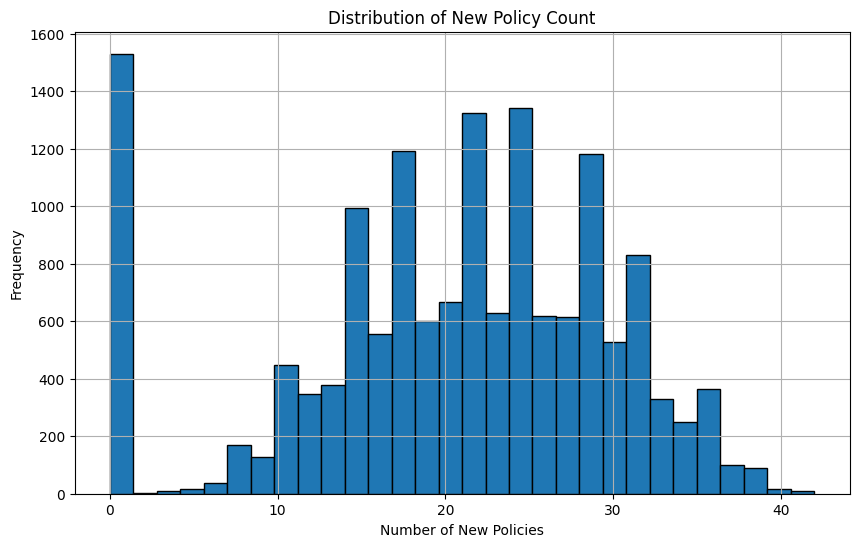

Top 10 Performing Agents (Average New Policies):
agent_code
f3eb210e    34.000000
695935d8    32.000000
31e59316    32.000000
272f6f80    31.500000
e63b3cba    29.333333
aa23f1f0    29.000000
c21ae5a1    28.000000
c3e9a960    28.000000
c54be95a    28.000000
deed0e45    28.000000
Name: new_policy_count, dtype: float64


In [52]:
summary_stats = train_insurance_df.agg({
    'new_policy_count': ['mean', 'median', 'std', 'min', 'max'],
    'ANBP_value': ['mean', 'median', 'std', 'min', 'max'],
    'net_income': ['mean', 'median', 'std', 'min', 'max']
}).round(2)

print("Summary Statistics:")
print(summary_stats)

# average policies per agent
avg_policies = train_insurance_df.groupby('agent_code')['new_policy_count'].mean().describe()
print("\
Average Policies per Agent Distribution:")
print(avg_policies)

plt.figure(figsize=(10, 6))
plt.hist(train_insurance_df['new_policy_count'], bins=30, edgecolor='black')
plt.title('Distribution of New Policy Count')
plt.xlabel('Number of New Policies')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

top_agents = train_insurance_df.groupby('agent_code')['new_policy_count'].mean().sort_values(ascending=False).head(10)
print("\
Top 10 Performing Agents (Average New Policies):")
print(top_agents)

### Obervations from Agent Performance
- The average agent sells about 20 new policies per month, with a median of 21.
- ANBP value and net income also show substantial variation, with some agents earning much more than others.
- Most agents cluster around 18–22 policies per month, but a few high performers stand out.
- The best agents average 28–34 new policies per month.

In [54]:
train_insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15308 entries, 0 to 15307
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   row_id                           15308 non-null  int64         
 1   agent_code                       15308 non-null  object        
 2   agent_age                        15308 non-null  int64         
 3   agent_join_month                 15308 non-null  datetime64[ns]
 4   first_policy_sold_month          15308 non-null  datetime64[ns]
 5   year_month                       15308 non-null  datetime64[ns]
 6   unique_proposals_last_7_days     15308 non-null  int64         
 7   unique_proposals_last_15_days    15308 non-null  int64         
 8   unique_proposals_last_21_days    15308 non-null  int64         
 9   unique_proposal                  15308 non-null  int64         
 10  unique_quotations_last_7_days    15308 non-null  int64    

In [70]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

resampler = SMOTE(sampling_strategy=0.5, random_state=42)
under_sampler = RandomUnderSampler(sampling_strategy=0.8, random_state=42)

In [72]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, precision_recall_curve, fbeta_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from lightgbm import LGBMClassifier
from sklearn.calibration import CalibratedClassifierCV
import time
import warnings
import joblib
import pandas as pd
import numpy as np

warnings.filterwarnings('ignore')

train_df = pd.read_csv('../data/train_storming_round.csv', parse_dates=['year_month'])
test_df = pd.read_csv('../data/test_storming_round.csv', parse_dates=['year_month'])

def create_features(df):
    df['months_since_joining'] = (df['year_month'] - pd.to_datetime(df['agent_join_month'])).dt.days / 30
    df['months_since_first_sale'] = (df['year_month'] - pd.to_datetime(df['first_policy_sold_month'])).dt.days / 30
    
    df['prop_to_quote_ratio'] = (df['unique_proposal'] + 1) / (df['unique_quotations'] + 2)
    df['sale_conversion_rate'] = (df['new_policy_count'] + 0.5) / (df['unique_customers'] + 1)
    
    for window in [7, 14, 21]:
        df[f'policy_trend_{window}'] = df.groupby('agent_code')['new_policy_count'].transform(
            lambda x: x.rolling(window, min_periods=1).mean()
        )
    
    return df

train_df = create_features(train_df)
test_df = create_features(test_df)

train_df = train_df.sort_values(['agent_code', 'year_month'])
train_df['target'] = train_df.groupby('agent_code')['new_policy_count'].shift(-1).eq(0).astype(int)
train_df = train_df.groupby('agent_code').apply(lambda x: x.iloc[:-1]).reset_index(drop=True)

X = train_df.drop(columns=['target', 'row_id', 'agent_code', 'agent_join_month', 'first_policy_sold_month', 'year_month'])
y = train_df['target']
X_test = test_df[X.columns]  # Ensure same features

scale_pos_weight = len(y[y == 0]) / len(y[y == 1])

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', QuantileTransformer(output_distribution='normal'))
    ]), numeric_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), categorical_features)
])

def build_optimized_pipeline():
    model = LGBMClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        num_leaves=31,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=0.1,
        scale_pos_weight=scale_pos_weight,
        random_state=42,
        n_jobs=-1
    )
    
    return ImbPipeline([
        ('preprocessor', preprocessor),
        ('resampler', SMOTE(sampling_strategy=0.6, random_state=42, k_neighbors=5)),
        ('undersampler', RandomUnderSampler(sampling_strategy=0.7, random_state=42)),
        ('classifier', model)
    ])

pipeline = build_optimized_pipeline()
pipeline.fit(X, y)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
print(f"Cross-validated AUC: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

calibrated = CalibratedClassifierCV(pipeline, cv=5, method='isotonic')
calibrated.fit(X, y)

# Save the trained calibrated model
timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
model_filename = f"calibrated_model_{timestamp}.pkl"
joblib.dump(calibrated, model_filename)
print(f"Trained model saved as {model_filename}")

test_probs = calibrated.predict_proba(X_test)[:, 1]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
calibrated.fit(X_train, y_train)
val_probs = calibrated.predict_proba(X_val)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_val, val_probs)
f2_scores = [fbeta_score(y_val, val_probs >= t, beta=2) for t in thresholds]
optimal_threshold = thresholds[np.argmax(f2_scores)]

submission = pd.DataFrame()
submission['target_column'] = (test_probs >= optimal_threshold).astype(int)
print("\nFinal submission distribution:")
print(submission['target_column'].value_counts(normalize=True))

submission_file = f"optimized_submission_{timestamp}.csv"
submission.to_csv(submission_file, index=False)
print(f"Submission saved as {submission_file}")

try:
    num_features = numeric_features.tolist()
    
    if len(categorical_features) > 0:
        cat_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder']
        cat_features = cat_encoder.get_feature_names_out(categorical_features).tolist()
        feature_names = num_features + cat_features
    else:
        feature_names = num_features
    
    if hasattr(pipeline.named_steps['classifier'], 'feature_importances_'):
        importances = pipeline.named_steps['classifier'].feature_importances_
        
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        importance_df.to_csv('feature_importances.csv', index=False)
        print("\nTop 10 features:")
        print(importance_df.head(10))
except Exception as e:
    print(f"Could not generate feature importances: {str(e)}")


[LightGBM] [Info] Number of positive: 7781, number of negative: 11115
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6369
[LightGBM] [Info] Number of data points in the train set: 18896, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.411780 -> initscore=-0.356611
[LightGBM] [Info] Start training from score -0.356611
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

### Agent Performance Categorization

Agent Performance Distribution:
performance
Low       541
High      350
Medium     14
Name: count, dtype: int64


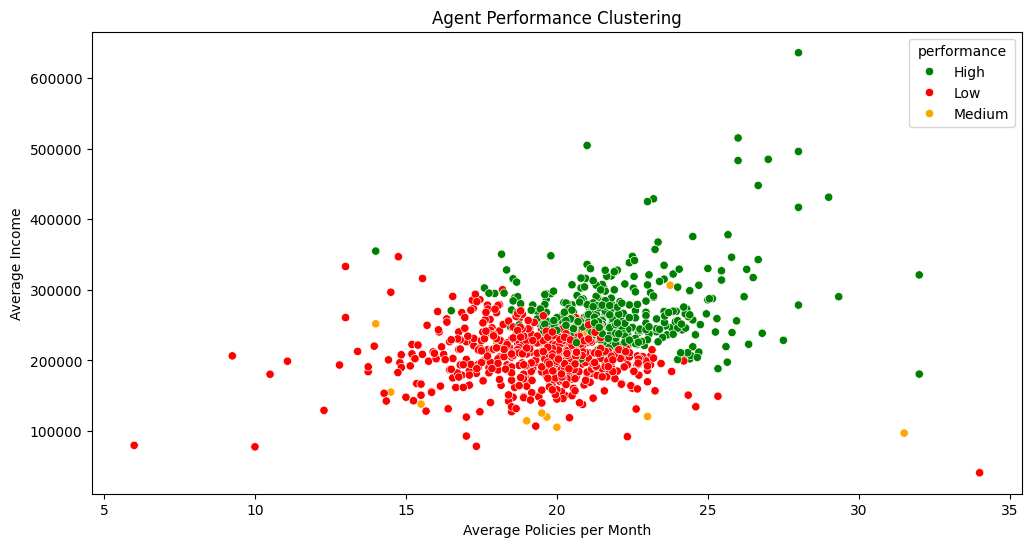

In [74]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

def categorize_agents(df):
    """Categorize agents into High/Medium/Low performers with NaN handling"""
    
    agent_stats = df.groupby('agent_code').agg({
        'new_policy_count': ['mean', 'std', 'count'],
        'ANBP_value': 'mean',
        'net_income': 'mean',
        'unique_customers': 'mean',
        'year_month': ['min', 'max']
    })
    
    agent_stats.columns = ['_'.join(col).strip() for col in agent_stats.columns.values]
    
    agent_stats = agent_stats.rename(columns={
        'new_policy_count_mean': 'avg_policies',
        'new_policy_count_std': 'std_policies',
        'new_policy_count_count': 'active_months',
        'ANBP_value_mean': 'avg_anbp',
        'net_income_mean': 'avg_income',
        'unique_customers_mean': 'avg_customers',
        'year_month_min': 'first_active_month',
        'year_month_max': 'last_active_month'
    })
    
    agent_stats['tenure'] = ((agent_stats['last_active_month'] - agent_stats['first_active_month']).dt.days / 30).round()
    
    agent_stats['stability'] = 1 / (1 + agent_stats['std_policies'])
    
    numeric_cols = ['avg_policies', 'avg_anbp', 'avg_income', 'avg_customers', 'stability']
    agent_stats[numeric_cols] = agent_stats[numeric_cols].fillna(agent_stats[numeric_cols].median())
    
    preprocessor = Pipeline([ 
        ('scaler', StandardScaler())
    ])
    
    features = ['avg_policies', 'avg_anbp', 'avg_income', 'avg_customers', 'stability']
    X = agent_stats[features]
    
    X_processed = preprocessor.fit_transform(X)
    
    kmeans = KMeans(n_clusters=3, random_state=42)
    agent_stats['cluster'] = kmeans.fit_predict(X_processed)
    
    cluster_means = agent_stats.groupby('cluster')['avg_policies'].mean().sort_values()
    cluster_labels = {cluster_means.index[0]: 'Low', 
                     cluster_means.index[1]: 'Medium', 
                     cluster_means.index[2]: 'High'}
    agent_stats['performance'] = agent_stats['cluster'].map(cluster_labels)
    
    return agent_stats

train_insurance_df = pd.read_csv('../data/train_storming_round.csv', parse_dates=['year_month', 'agent_join_month', 'first_policy_sold_month'])

agent_performance = categorize_agents(train_insurance_df)
print("Agent Performance Distribution:")
print(agent_performance['performance'].value_counts())

plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='avg_policies', 
    y='avg_income', 
    hue='performance',
    data=agent_performance,
    palette={'High': 'green', 'Medium': 'orange', 'Low': 'red'}
)
plt.title('Agent Performance Clustering')
plt.xlabel('Average Policies per Month')
plt.ylabel('Average Income')
plt.savefig('agent_performance_clustering.png')
plt.show()

agent_performance.to_csv('agent_performance_categories.csv')